In [15]:
import pandas as pd
path =r'https://www.dropbox.com/s/rvwjw8miow6jswy/articles.csv?dl=1'
news = pd.read_csv(path)

In [24]:

news.head()

turismo = news[news['category']=='yurismo']

In [25]:
import spacy
from spacy.lang.pt import Portuguese
nlp_pt = spacy.load('pt_core_news_sm')

In [33]:
STOP_WORDS = spacy.lang.pt.stop_words.STOP_WORDS
stop_update = ('ao','milhão','bilhão','de','em','e','a','ao','da','do','tudo','bilhão','milhões','bilhões', '4t14','pró','t','h')
STOP_WORDS.add(stop_update)

In [34]:

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

STOP_WORDS=list(STOP_WORDS)
tfidf = TfidfVectorizer(
    
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = STOP_WORDS
)
tfidf.fit(turismo['text'])
text = tfidf.transform(turismo['text'])

ValueError: empty vocabulary; perhaps the documents only contain stop words

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


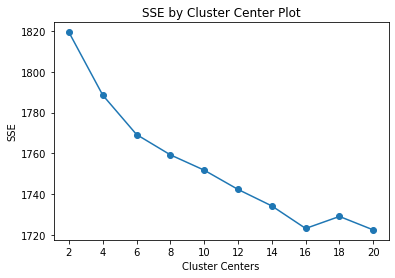

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        if k is not None:
            sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
            print('Fit {} clusters'.format(k))
        
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=16, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    try:
        max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    except ValueError:
        max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    df.iterrows()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
    return df
            
df_clusters = get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)

In [ ]:
 # # remove \n e \r
    # c = re.sub(r'\n', ' ', text)
    # c = re.sub(r'\r', ' ', c)

    # # remove caracteres alfanumericos
    # c = c.replace(':', '')
    # c = c.replace('/', '')
    # c = re.sub(r'R\$', '', c)
    # c = re.sub(r'\W', ' ', c)

    # # remove espaços adicionais
    # c = re.sub(r'\s+', ' ', c)

    # # remove espacos adicionais no inicio das frases
    # c = re.sub(r'^\s+', '', c)

    # # remove espacos adicionais no final das frases
    # c = re.sub(r'\s+$', '', c)

    # # remove numbers and any other unexpect char
    # c= re.sub(r"(?<!\w)([^\w\s]|\d)+(?!\w)", " ", c)
    
    # c = unidecode(c) # TIRA ACENTO
    # trans_table = str.maketrans('','', string.digits)
    # c = c.translate(trans_table)

1


In [1]:
import pandas as pd


df = pd.read_parquet(r'C:\Users\Thiago Jose\Desktop\CODIGO.PY\Aulas-curso\ITAU_QUANT_DESAFIO\Database\cotacoes.parquet')

df[['ticker','preco_fechamento_ajustado','quantidade_negociada' ]]

,ticker,preco_fechamento_ajustado,quantidade_negociada
0,WISA3,0.71,6000
1,ESTC3,8.07,39400
2,BDLL4,83.56,400
3,JFEN3,388.21,13900
4,CTPC3,1.55,700
...,...,...,...
974149,ITUB4,21.66,10629800
974150,TUPY3,15.33,513800
974151,LIPR3,41.11,100
974152,PETR3,6.85,4767200


In [2]:
df_empresas = pd.read_csv(r'C:\Users\Thiago Jose\Desktop\CODIGO.PY\Aulas-curso\ITAU_QUANT_DESAFIO\Database\Empresas_clusters.csv')
df_empresas.drop(columns='Unnamed: 0', inplace=True)

df_empresas

,Empresa,cluster,repeated
0,BRADESPAR S.A.,6,101
1,ENERGISA S.A.,11,43
2,SINQIA S.A.,1,41
3,CENTRAIS ELET BRAS S.A. - ELETROBRAS,10,39
4,GOL LINHAS AEREAS INTELIGENTES S.A.,1,38
...,...,...,...
235,TAM S.A.,12,1
236,CONC DO AEROPORTO INTERNACIONAL DE GUARULHOS S.A.,7,1
237,MAHLE-METAL LEVE S.A.,7,1
238,MUNDIAL S.A. - PRODUTOS DE CONSUMO,7,1


In [15]:
df = pd.read_csv(r'C:\Users\Thiago Jose\Desktop\CODIGO.PY\Aulas-curso\ITAU_QUANT_DESAFIO\Database\Ticker-clusters - Página1.csv')

df.drop(columns='Unnamed: 0', inplace=True)


for cluster in range(0,20):
    df_aux = df[df['cluster']==cluster]
    df_aux.to_csv(f'Empresas_cluster_{cluster}.csv')


In [16]:
df_aux

,Empresa,Ticker,Novo código,cluster,repeated
12,NEOENERGIA S.A.,NGRD3,NaN,19,31
185,CIA ENERGETICA DE PERNAMBUCO - CELPE,CEPE3,NaN,19,4
186,CIA ELETRICIDADE EST. DA BAHIA - COELBA,CEEB5,NaN,19,4
187,CIA ENERGETICA DO RIO GDE NORTE - COSERN,CSRN3,NaN,19,4


In [ ]:
for i,j in enumerate(empresa_cluster[empresa_cluster['cluster']==1]['Empresa']):
    if i<27:
       print(j)
    else:
        empresa_cluster.loc[empresa_cluster['Empresa']==j,'cluster']  = 4

In [51]:
import pandas as pd

cdi= pd.read_parquet(r'C:\Users\Thiago Jose\Desktop\CODIGO.PY\Aulas-curso\ITAU_QUANT_DESAFIO\Database-desafio\cdi.parquet')
ibov = pd.read_parquet(r'C:\Users\Thiago Jose\Desktop\CODIGO.PY\Aulas-curso\ITAU_QUANT_DESAFIO\Database-desafio\ibov.parquet')
df_cotacoes = pd.read_parquet(r'C:\Users\Thiago Jose\Desktop\CODIGO.PY\Aulas-curso\ITAU_QUANT_DESAFIO\Database\cotacoes.parquet')

In [54]:
df_cotacoesv2= df_cotacoes[['data','ticker','preco_fechamento_ajustado']]

df_cotacoesv2 = df_cotacoesv2[(df_cotacoesv2['data']>='2012-01-01')&(df_cotacoesv2['data']<'2016-01-01')]

In [94]:
df_cotacoesv2

carteira_1 = df_cotacoesv2[(df_cotacoesv2['ticker']=='ENGIE')| (df_cotacoesv2['ticker']=='SNSY5') | (df_cotacoesv2['ticker']=='IDVL3') | (df_cotacoesv2['ticker']=='PETR3')&(df_cotacoesv2['data']>'2013-01-01')]

carteira_1['variacao'] = 0

for ticker in carteira_1['ticker']:
    carteira_1.loc[carteira_1['ticker']==ticker,'variacao'] = carteira_1.loc[carteira_1['ticker']==ticker]['preco_fechamento_ajustado'].pct_change()


carteira_1.sort_values(by=['data'],inplace=True,ascending=True)


C:\Users\Thiago Jose\AppData\Local\Temp\ipykernel_27244\1098299155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carteira_1['variacao'] = 0
C:\Users\Thiago Jose\AppData\Local\Temp\ipykernel_27244\1098299155.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carteira_1.loc[carteira_1['ticker']==ticker,'variacao'] = carteira_1.loc[carteira_1['ticker']==ticker]['preco_fechamento_ajustado'].pct_change()
C:\Users\Thiago Jose\AppData\Local\Temp\ipykernel_27244\1098299155.py:11: SettingWithCopyWarning: 
A v

In [71]:
ibov['data'] = ibov['data'].apply(lambda x : pd.to_datetime(x,format='%Y-%m-%d')) 
cdi['data'] = cdi['data'].apply(lambda x : pd.to_datetime(x,format='%Y-%m-%d')) 

cdi = cdi.sort_values(by=['data'])
ibov = ibov.sort_values(by=['data'])

ibov = ibov[(ibov['data']>'2012-01-01')& (ibov['data']<'2016-01-01')]
cdi = cdi[(cdi['data']>'2012-01-01')& (cdi['data']<'2016-01-01')]

cdi['variacao'] = cdi['retorno'].pct_change()
ibov['variacao'] = ibov['fechamento'].pct_change()

In [72]:
df_total_rf = cdi.merge(ibov, how='left', left_on='data', right_on='data', suffixes=['_cdi','_ibov'])

df_total_rf['data'] = df_total_rf['data'].apply(lambda x : pd.to_datetime(x,format='%Y-%m-%d')) 

# df_total_rf  = carteira_1.merge(df_total_rf, how='left', left_on='data', right_on='data')

In [76]:
df_total_rf_v2 = df_total_rf[['data','variacao_cdi','variacao_ibov']]

df_total_rf_v2['beta'] = ((df_total_rf_v2['variacao_ibov'] + 1)/(df_total_rf_v2['variacao_cdi'] + 1) -1)

df_total_rf_v2['Rf_plus_beta'] = ((df_total_rf_v2['variacao_ibov'] + 1)/(df_total_rf_v2['variacao_cdi'] + 1) -1)

C:\Users\Thiago Jose\AppData\Local\Temp\ipykernel_27244\133834853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_rf_v2['beta'] = ((df_total_rf_v2['variacao_ibov'] + 1)/(df_total_rf_v2['variacao_cdi'] + 1) -1)


In [77]:
df_total_rf_v2.head()

,data,variacao_cdi,variacao_ibov,beta
0,2012-01-02,NaN,NaN,NaN
1,2012-01-03,-0.000877,0.024825,0.025725
2,2012-01-04,0.000000,0.001689,0.001689
3,2012-01-05,-0.002635,-0.013794,-0.011189
4,2012-01-06,0.000881,0.000927,0.000047


In [123]:
carteira_1

,data,ticker,preco_fechamento_ajustado,variacao
256452,2012-01-02,SNSY5,7.10,NaN
256453,2012-01-02,IDVL3,83.06,NaN
257153,2012-01-03,IDVL3,83.06,0.000000
257347,2012-01-03,SNSY5,7.18,0.011268
258000,2012-01-04,IDVL3,83.06,0.000000
...,...,...,...,...
744173,2015-12-29,SNSY5,0.58,0.054545
744411,2015-12-29,PETR3,3.47,-0.005731
744786,2015-12-30,SNSY5,0.58,0.000000
744734,2015-12-30,PETR3,3.47,0.000000


In [124]:
carteira_1_v2=carteira_1.pivot(index='data',columns='ticker',values='variacao')

In [125]:
carteira_1_v2

ticker,IDVL3,PETR3,SNSY5
data,,,
2012-01-02,NaN,NaN,NaN
2012-01-03,0.000000,NaN,0.011268
2012-01-04,0.000000,NaN,0.005571
2012-01-05,0.000000,NaN,0.004155
2012-01-06,0.000000,NaN,-0.004138
...,...,...,...
2015-12-22,0.000000,0.026706,0.160000
2015-12-23,0.033333,0.040462,0.000000
2015-12-28,0.038710,-0.030556,-0.051724


In [135]:
carteira_1_v2.fillna(0,inplace=True)

for i in range(len(carteira_1_v2.index)):
    print(carteira_1_v2['IDVL3'][i]+1)
    carteira_1_v2['varicao_wallet']= ((carteira_1_v2['IDVL3'][i]+1)*(carteira_1_v2['PETR3'][i]+1)*(carteira_1_v2['SNSY5'][i]+1))-1

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [3]:
import pandas as pd

det = pd.read_parquet(r'C:\Users\Thiago Jose\Desktop\CODIGO.PY\Aulas-curso\ITAU_QUANT_DESAFIO\Database-desafio\pl_db.parquet')

det

,data,ticker,valor
0,2016-10-28,AALR3,1.804972
1,2016-10-29,AALR3,1.804972
2,2016-10-30,AALR3,1.804972
3,2016-10-31,AALR3,1.804972
4,2016-11-01,AALR3,1.804972
...,...,...,...
2727830,2023-10-03,ZAMP3,1.175117
2727831,2023-10-04,ZAMP3,1.175117
2727832,2023-10-05,ZAMP3,1.175117
2727833,2023-10-06,ZAMP3,1.175117


In [132]:
carteira_1_v2

ticker,IDVL3,PETR3,SNSY5,varicao_wallet
data,,,,
2012-01-02,0.0000,0.0000,0.0000,0.0000
2012-01-03,0.0000,0.0000,0.0113,0.0000
2012-01-04,0.0000,0.0000,0.0056,0.0000
2012-01-05,0.0000,0.0000,0.0042,0.0000
2012-01-06,0.0000,0.0000,-0.0041,0.0000
...,...,...,...,...
2015-12-22,0.0000,0.0267,0.1600,0.0000
2015-12-23,0.0333,0.0405,0.0000,0.0000
2015-12-28,0.0387,-0.0306,-0.0517,0.0000


In [131]:
pd.options.display.float_format = '{:,.4f}'.format